# Response Themes for "What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"

* Goal: Extract theme keywords from `hinderances`, `integrations`, `workflow_needs_addressed`, `workflow_needs_not_addressed` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [5]:
rs = np.random.RandomState(123)

In [6]:
pd.set_option('max_colwidth', 1000)

In [7]:
df = pd.read_csv('survey_short_columns.csv')

In [8]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [9]:
hinder = df.hinderances

In [10]:
hinder.isnull().value_counts()

True     943
False    763
Name: hinderances, dtype: int64

In [11]:
hinder = hinder.dropna()

## Initial Samples

I ran the sampling code below 6 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [12]:
show(hinder.sample(20, random_state=rs))

0) Jupyter Notebook "Windows 7+" experience is inferior to Linux one

1) Integration with text editor 

2) Version control (and, which is related, collaborative version control).

3) Doesn't seem to fit with building a large project, prefer IDE

4) remembering how to get it setup

5) better connections to external DBs, easier interact widgets.

6) Primarily use R, Rstudio is better for R.

7) * a "clear and run all" button to get rid of variable persistence (possible with Kernel > Clear all then run but that's more clicks) * a IPython notebook .app -- it'd be really nice to double click on a notebook and have it open

8) School assignments

9) In ML, I have a cell output the loss at each epoch or few thousand iterations. This makes the output really long and to go between cells I have to scroll a lot to get past the wall of text I made.

10) The notebook workflows are very linear, doing experiments is difficult. Also some source control/diff tool would be really nice.

11) - Better edi

In [13]:
themes = {
    'version' : ['version control', 'diff', 'source control', 'git'],
    'ide' : ['text editor', 'ide', 'vim', 'emacs', 'editing', 'key binding', 'key mapping', 'keyboard', 'shortcuts', 'debug', 'programming'],
    'setup' : ['setup', 'desktop', 'install', 'documentation', 'kernels', 'customization'],
    'widgets' : ['widgets', 'view', 'interact', 'dataframes'],
    'connections' : ['connections', 'db'],
    'language': ['rstudio', 'clojure', 'scala', 'c#'],
    'ux' : ['ui', 'design', 'linear', 'search', 'theme', 'collapse', 'organization', 'proliferation', 'cut', 'merge', 'completion', 'aesthetic'],
    'collab' : ['sharing', 'collaboration', 'publication', 'export', 'deploy', 'authoring', 'dashboard', 'cron', 'module', 'reuse', 'latex', 'slides'],
    'robust' : ['stability', 'crash', 'reload', 'bug', 'reliability', 'windows', 'ipad', 'slow', 'performance']
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes in order to improve coverage.

In [14]:
import re

In [15]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [16]:
def tag_themes(responses, themes):
    tagged = hinder.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = hinder.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [17]:
tagged = tag_themes(hinder, themes)
tagged.themes.str.count(',').value_counts()

ux 70
collab 107
robust 44
ide 197
version 139
connections 2
widgets 52
language 22
setup 84


0    302
1    277
2    128
3     40
4     16
Name: themes, dtype: int64

In [18]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,hinderances,themes
1218,"It's good for writing up results, but I find it awkward for messing around.",
1162,No find and replace functionality!,
556,"I use Spark in my day job, it would be awesome to have a Notebook manage jobs on a cluster. This may be possible, but it's easy-enough (or widely-used enough) to have become a part of my work.",
430,easy ruby support,
1122,Availability from Ubuntu repositories,
10,Don't use it to teach all of my courses (yet).,
468,Convincing colleagues,
816,"Hard to keep track of large number of notebooks that need to be regular updated, or that are used to run commands.",
1474,Lack of proper equation numbering and referencing (same for table of contents etc).,
1164,Nothing. My entire workflow happens in Jupyter.,


In [19]:
themes = {
    'version' : ['version control', 'source control', 'git'],
    'ide' : ['text editor', 'ide', 'vim', 'emacs', 'editing', 'editor', 'key binding', 'key mapping', 'keyboard', 
             'shortcuts', 'debug', 'programming', 'intellisense'],
    'setup' : ['setup', 'desktop', 'install', 'documentation', 'kernels', 'customization', 'turn-key', 'hosted', 
               'server', 'cost', 'access'],
    'widgets' : ['widgets', 'view', 'interact', 'dataframes'],
    'connections' : ['connections', 'db', 'sas', 'd3', 'plot', 'conda', 'pentadactyl', 'spark', 'fenics'],
    'language': ['rstudio', 'clojure', 'scala', 'c#', 'matlab', 'sql', 'perl', 'julia', 'javascript', 'haskell', 
                 'ruby', 'fortran', 'c\+\+', 'sage'],
    'ux' : ['ui', 'design', 'linear', 'search', 'theme', 'collaps', 'organization', 'proliferation', 'cut', 'merge', 
            'completion', 'aesthetic', 'experience', 'interface', 'workspace', 'clutter', 'unwield', 'structure',
            'cumbersome', 'unnatural', 'understand', 'keep track', 'navigate'],
    'collab' : ['sharing', 'collab', 'publication', 'publish', 'export', 'deploy', 'authoring', 'dashboard', 'cron', 
                'module', 'reus', 'latex', 'slides', 'report'],
    'robust' : ['stability', 'crash', 'reload', 'bug', 'reliability', 'windows', 'ipad', 'slow', 'performance', 
                'error', 'speed'],
    'external' : ['legacy', 'acceptance', 'compliance', 'adoption', 'nobody', 'policy', 'inertia'],
    'nothing': ['nothing', 'no need']
}

## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [20]:
tagged = tag_themes(hinder, themes)
tagged.themes.str.count(',').value_counts()

nothing 33
ux 130
collab 133
robust 51
ide 222
version 93
connections 27
widgets 52
language 59
setup 114
external 11


1    352
0    184
2    141
3     63
4     16
5      4
6      3
Name: themes, dtype: int64

In [21]:
from IPython.display import display, clear_output

In [22]:
for key in themes:
    clear_output()
    display(tagged[tagged.themes.str.contains(key)].sample(10))
    if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
        break

,hinderances,themes
1184,Nothing special,"nothing,"
1456,Nothing.,"nothing,"
613,Nothing. Too much time in meetings.,"nothing,"
176,"Nothing, the ability to combine data analysis and reporting (to .pdf) in a single document is perfect.","nothing,collab,"
1576,"Nothing, really. It works great.","nothing,"
980,Nothing. I switch between data projects where I use it and infrastructure projects where I don't.,"nothing,"
960,"Nothing, I always use it for the tasks it can handle","nothing,"
49,Nothing!,"nothing,"
54,Nothing,"nothing,"
38,nothing,"nothing,"


Showing `nothing`. Type Enter to continue, "q" to stop.q


## Topic Model

The manual tagging above is but one way of breaking down the responses into themes. I wanted to try another approach as validation. So I experimented with LSA and clustering to see how they would group responses.

In [23]:
import gensim
import string
import requests

In [170]:
texts = gensim.parsing.preprocess_documents(hinder)

In [173]:
dictionary = gensim.corpora.Dictionary(texts)

In [177]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [184]:
tfidf = gensim.models.TfidfModel(corpus)

In [185]:
corpus_tfidf = tfidf[corpus]

In [245]:
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, DBSCAN
from gensim.matutils import corpus2csc

I informally experimented with the topic and cluster counts for quite some time, looking at the inertia graph and the resulting cluster sizes.

In [296]:
# set the number of clusters, must be >=1
topics_n = 10
clusters_n = 10

In [299]:
%matplotlib inline

In [304]:
import matplotlib.pyplot as plt
import math

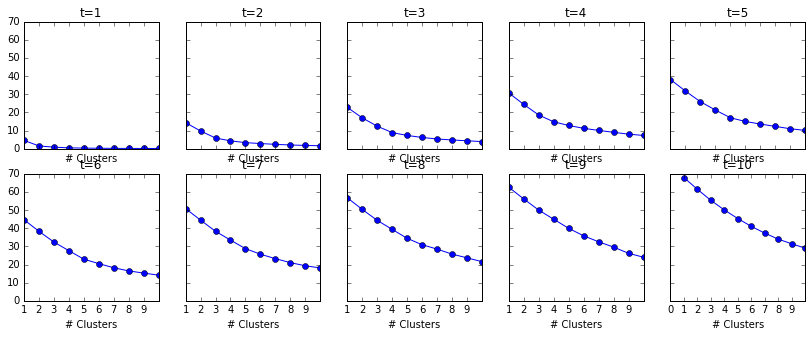

In [306]:
fig, axes = plt.subplots(math.ceil(topics_n / 5), 5, sharex=True, sharey=True, figsize=(14, 5))

for t in range(1, topics_n+1):
    inertia = [np.NaN]
    lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=t)
    corpus_lsi = lsi[corpus_tfidf]
    X = corpus2csc(corpus_lsi).transpose()
    
    for k in range(1,clusters_n+1):
        k_means = KMeans(n_clusters=k)
        k_means.fit(X)
#         print('k = %d, inertia= %f' % (k, k_means.inertia_ ))
        inertia.append(k_means.inertia_)

    ax = axes[(t-1) // 5][(t-1) % 5]
    ax.plot(inertia, '-o')
    ax.set_xticks(range(clusters_n))
    ax.set_title('t=%d' % t)
#     ax.set_ylabel('Inertia')
    ax.set_xlabel('# Clusters')

In [313]:
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=4)
corpus_lsi = lsi[corpus_tfidf]
X = corpus2csc(corpus_lsi).transpose()
k_means = KMeans(n_clusters=10)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [314]:
clusters = pd.Series(k_means.labels_, index=hinder.index)
clusters.value_counts()

1    284
8    139
5    128
7     69
3     62
0     28
2     20
6     15
9      9
4      9
dtype: int64

In [316]:
tagged['cluster'] = clusters

In [320]:
tagged[tagged.cluster == 6]

,hinderances,themes,cluster
12,real time collaboration,"collab,",6
24,working on notebooks collaboratively,"collab,",6
31,Time.,,6
120,I don't use Python often enough,,6
151,I don't have the time. I don't use it at work.,,6
250,Time!!,,6
394,time ? No I really use it every day at work. (I can't use it much more!),,6
525,Most of the time I prefer working with the ipython shell directly. I use the notebook when I intend to share with others.,,6
669,I don't need it for work by nature. I'm using it to learn and for some side projects and I don't always have time to work on them,,6
757,Don't always do work on the computer,,6
